In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

In [127]:
width = 100
height = 100

races = 2
empty_ratio = 0.25

similarity_threshold = 0.8
n_iteration = 300

In [128]:
# populate

empty_houses = []
agents = {}

all_houses = list(itertools.product(range(width), range(height)))

random.shuffle(all_houses)
n_empty = int(empty_ratio * len(all_houses))

empty_houses = all_houses[:n_empty]
remaining_houses = all_houses[n_empty:]

houses_by_race = [remaining_houses[i::races] for i in range(races)]

In [129]:
# agents[(x, y)] = race

for race, houses in enumerate(houses_by_race):
    
    for house in houses:
        agents[house] = race

In [130]:
print(len(empty_houses))
print(len(agents))

2500
7500


In [131]:
def is_unsatisfied(x, y):
    race = agents[(x, y)]
    count_similar = 0
    count_different = 0
    
    if x > 0 and y > 0 and (x-1, y-1) not in empty_houses:
        if agents[(x-1, y-1)] == race:
            count_similar += 1
            
        else: 
            count_different += 1
            
    if y > 0 and (x, y-1) not in empty_houses:
        if agents[(x, y-1)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x < (width-1) and y > 0 and (x+1, y-1) not in empty_houses:
        if agents[(x+1, y-1)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x > 0 and (x-1, y) not in empty_houses:
        if agents[(x-1, y)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x < (width-1) and (x+1, y) not in empty_houses:
        if agents[(x+1, y)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x > 0 and y < (height-1) and (x-1, y+1) not in empty_houses:
        if agents[(x-1, y+1)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x > 0 and y < (height-1) and (x, y+1) not in empty_houses:
        if agents[(x, y+1)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    if x < (width-1) and y < (height-1) and (x+1, y+1) not in empty_houses:
        if agents[(x+1, y+1)] == race:
            count_similar += 1
            
        else:
            count_different += 1
            
    #print('Similar:', count_similar)
    #print('Different:', count_different)
    
    if (count_similar + count_different) == 0:
        return False
    
    else:
        return float(count_similar)/(count_similar + count_different) < similarity_threshold

In [132]:
print(is_unsatisfied(6, 8))

True


In [133]:
def move_to_empty(agent):
    agent_race = agents[agent]
    empty_house = random.choice(empty_houses)
    agents[empty_house] = agent_race
    del agents[agent]
    
    empty_houses.remove(empty_house)
    empty_houses.append(agent)

In [134]:
plt.rcParams.update({'figure.figsize': (15, 10)})

def plot(iteration):
    fig, ax = plt.subplots()
    agent_colors = {0:'b', 1:'r', 2:'g', 3:'c', 4:'m', 5:'y', 6:'k'}
    
    for agent in agents:
        ax.scatter(agent[0] + 0.5, agent[1] + 0.5, color = agent_colors[agents[agent]])
        
    ax.set_title('Iteration %d:' % iteration, fontsize = 10, fontweight = 'bold')
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

Iteration: 1, Number of changes: 6511


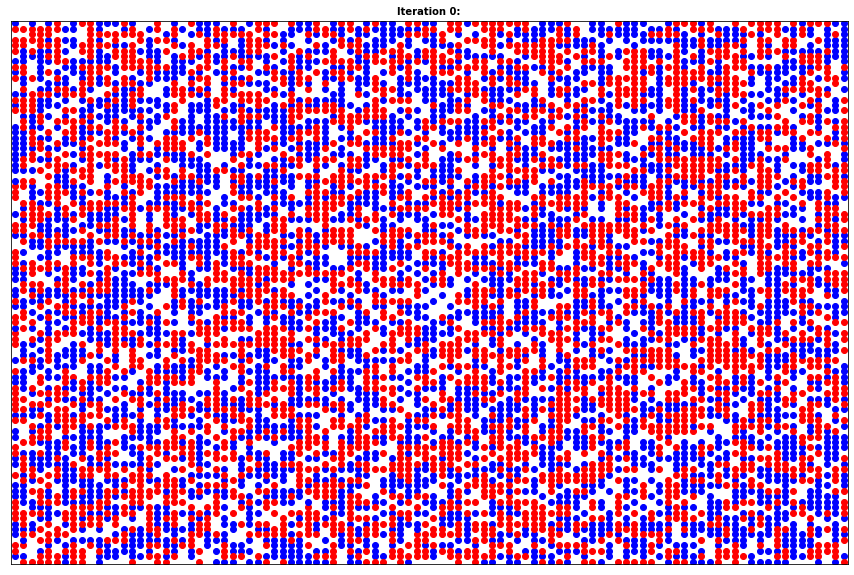

Iteration: 2, Number of changes: 5892
Iteration: 3, Number of changes: 5589
Iteration: 4, Number of changes: 5502
Iteration: 5, Number of changes: 5376
Iteration: 6, Number of changes: 5273
Iteration: 7, Number of changes: 5291
Iteration: 8, Number of changes: 5256
Iteration: 9, Number of changes: 5255
Iteration: 10, Number of changes: 5185
Iteration: 11, Number of changes: 5186


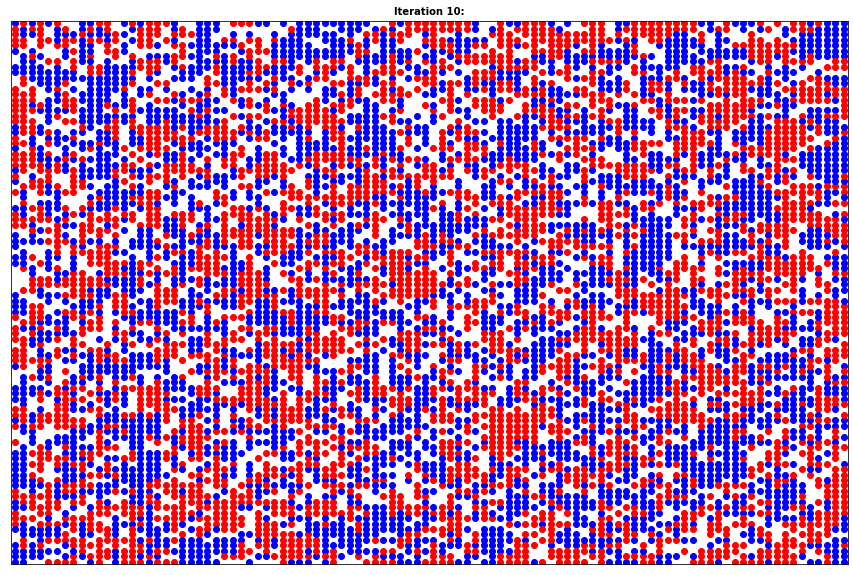

Iteration: 12, Number of changes: 5127
Iteration: 13, Number of changes: 5025
Iteration: 14, Number of changes: 5079
Iteration: 15, Number of changes: 5178
Iteration: 16, Number of changes: 5078
Iteration: 17, Number of changes: 5054
Iteration: 18, Number of changes: 5075
Iteration: 19, Number of changes: 5061
Iteration: 20, Number of changes: 5023
Iteration: 21, Number of changes: 5121


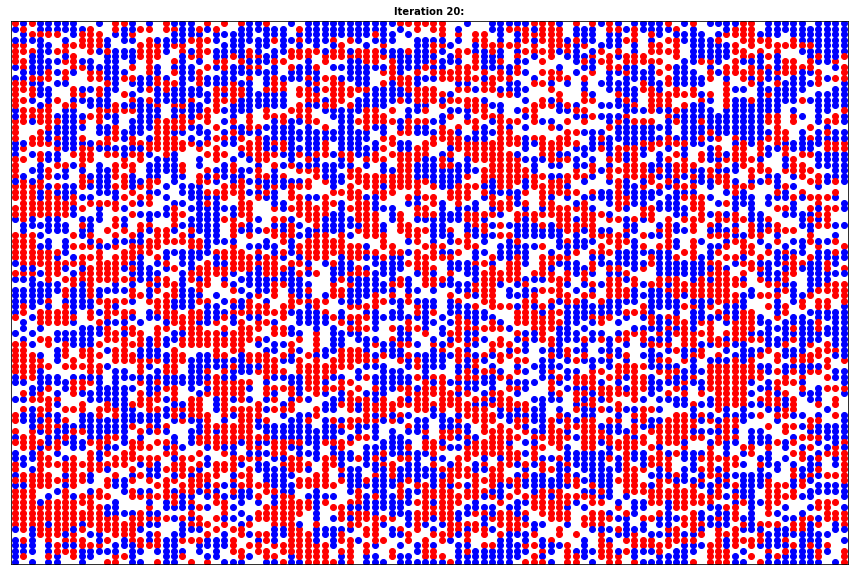

Iteration: 22, Number of changes: 5083
Iteration: 23, Number of changes: 5013
Iteration: 24, Number of changes: 5040
Iteration: 25, Number of changes: 4961
Iteration: 26, Number of changes: 4973
Iteration: 27, Number of changes: 5032
Iteration: 28, Number of changes: 5043
Iteration: 29, Number of changes: 5009
Iteration: 30, Number of changes: 5012
Iteration: 31, Number of changes: 5105


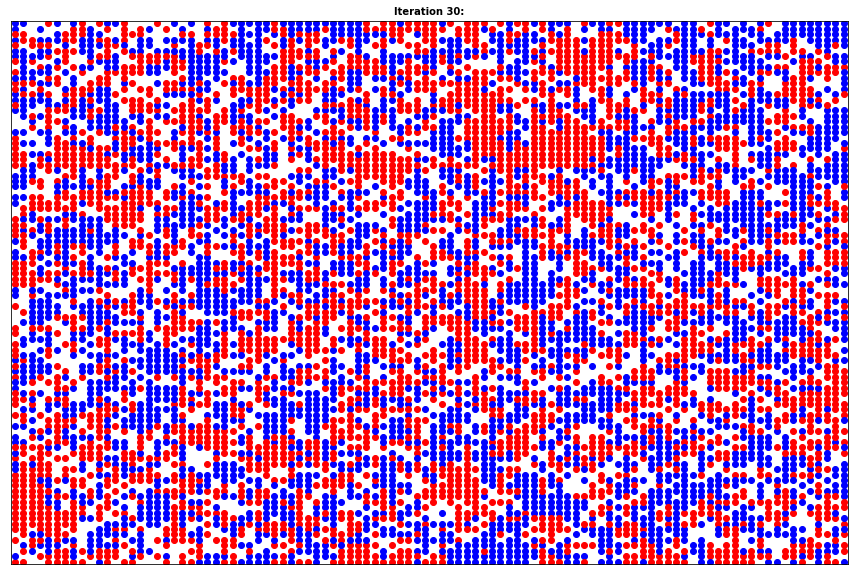

Iteration: 32, Number of changes: 5158
Iteration: 33, Number of changes: 5099
Iteration: 34, Number of changes: 5049
Iteration: 35, Number of changes: 5030
Iteration: 36, Number of changes: 5086
Iteration: 37, Number of changes: 5013
Iteration: 38, Number of changes: 5052
Iteration: 39, Number of changes: 5036
Iteration: 40, Number of changes: 5103
Iteration: 41, Number of changes: 5093


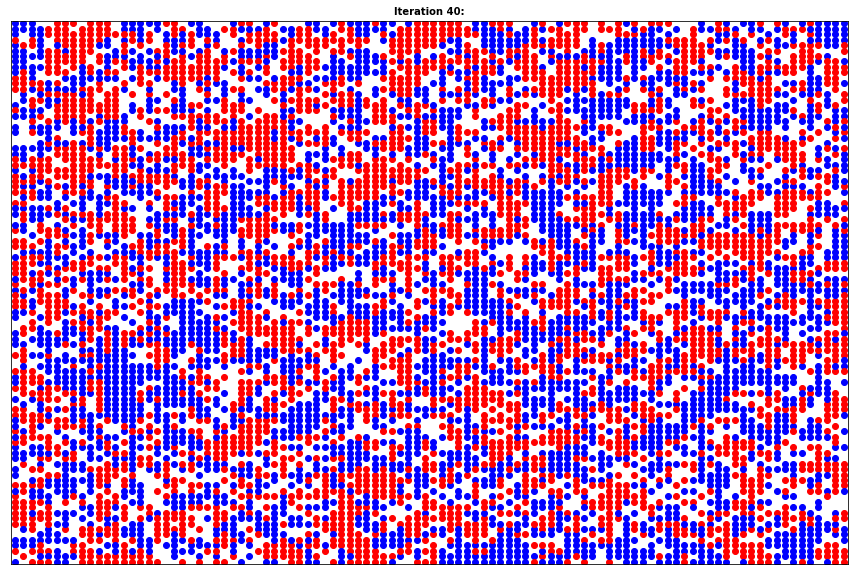

Iteration: 42, Number of changes: 5119
Iteration: 43, Number of changes: 5103
Iteration: 44, Number of changes: 4999
Iteration: 45, Number of changes: 4946
Iteration: 46, Number of changes: 5094
Iteration: 47, Number of changes: 5055
Iteration: 48, Number of changes: 4980
Iteration: 49, Number of changes: 5033
Iteration: 50, Number of changes: 5016
Iteration: 51, Number of changes: 5033


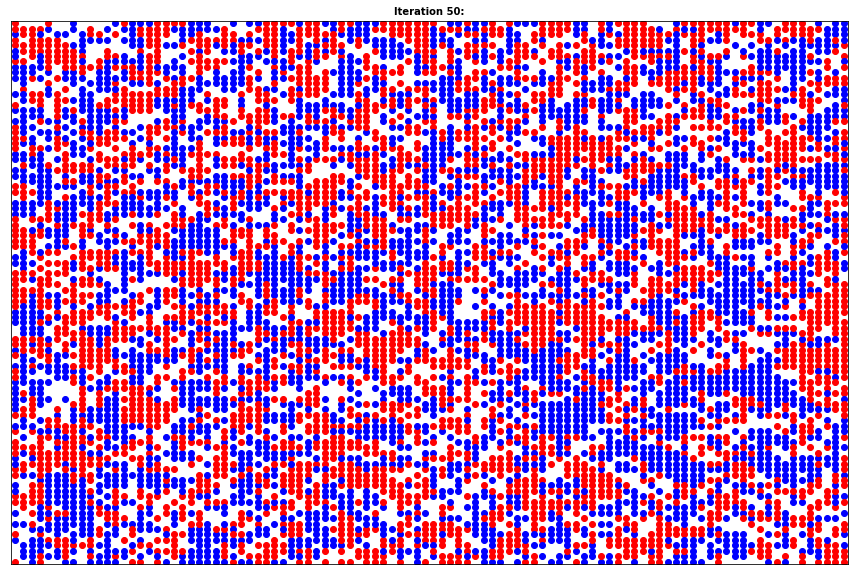

Iteration: 52, Number of changes: 5049
Iteration: 53, Number of changes: 5083
Iteration: 54, Number of changes: 5079
Iteration: 55, Number of changes: 5072
Iteration: 56, Number of changes: 5148
Iteration: 57, Number of changes: 5129
Iteration: 58, Number of changes: 5169
Iteration: 59, Number of changes: 5142
Iteration: 60, Number of changes: 5091
Iteration: 61, Number of changes: 5165


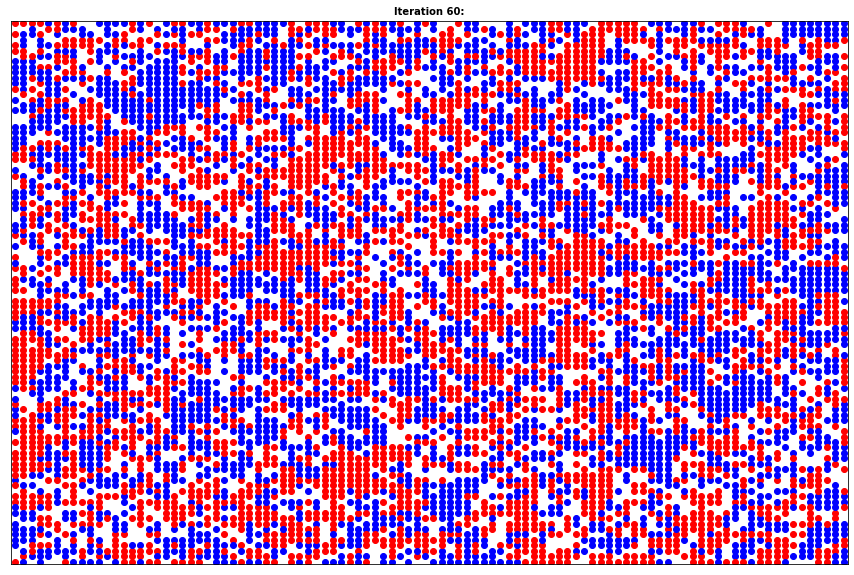

Iteration: 62, Number of changes: 5054
Iteration: 63, Number of changes: 5043
Iteration: 64, Number of changes: 5047
Iteration: 65, Number of changes: 5086
Iteration: 66, Number of changes: 5123
Iteration: 67, Number of changes: 5098
Iteration: 68, Number of changes: 5169
Iteration: 69, Number of changes: 5105
Iteration: 70, Number of changes: 5109
Iteration: 71, Number of changes: 5182


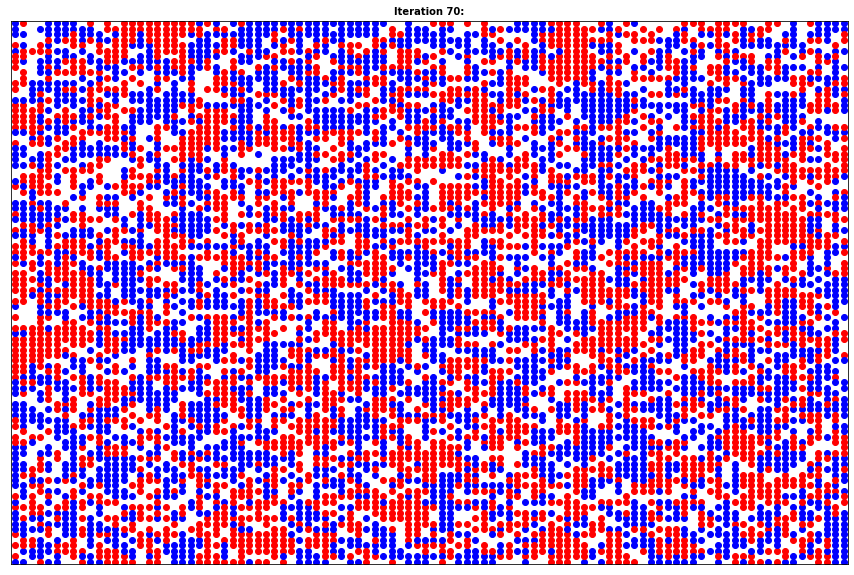

Iteration: 72, Number of changes: 5269
Iteration: 73, Number of changes: 5294
Iteration: 74, Number of changes: 5309
Iteration: 75, Number of changes: 5268
Iteration: 76, Number of changes: 5326
Iteration: 77, Number of changes: 5226
Iteration: 78, Number of changes: 5287
Iteration: 79, Number of changes: 5328
Iteration: 80, Number of changes: 5398
Iteration: 81, Number of changes: 5455


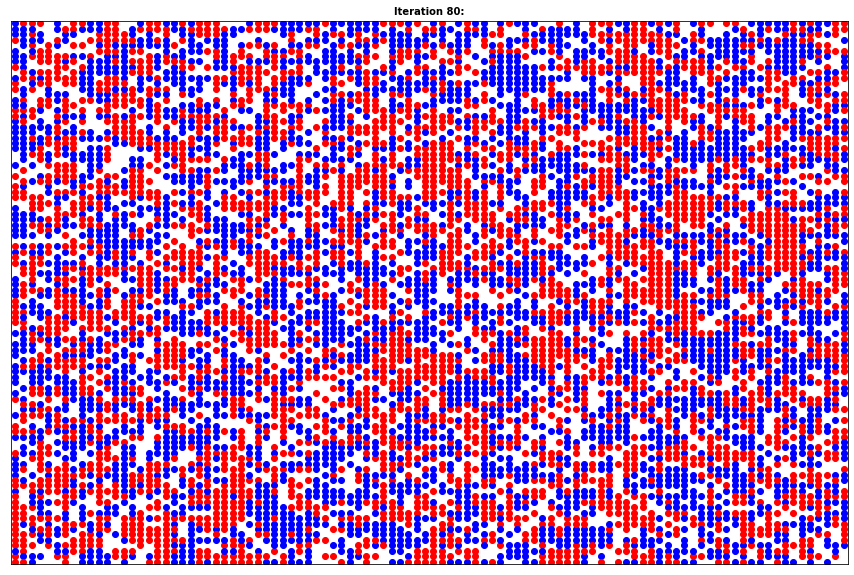

Iteration: 82, Number of changes: 5432
Iteration: 83, Number of changes: 5349
Iteration: 84, Number of changes: 5243
Iteration: 85, Number of changes: 5202
Iteration: 86, Number of changes: 5176
Iteration: 87, Number of changes: 5298
Iteration: 88, Number of changes: 5298
Iteration: 89, Number of changes: 5222
Iteration: 90, Number of changes: 5225
Iteration: 91, Number of changes: 5227


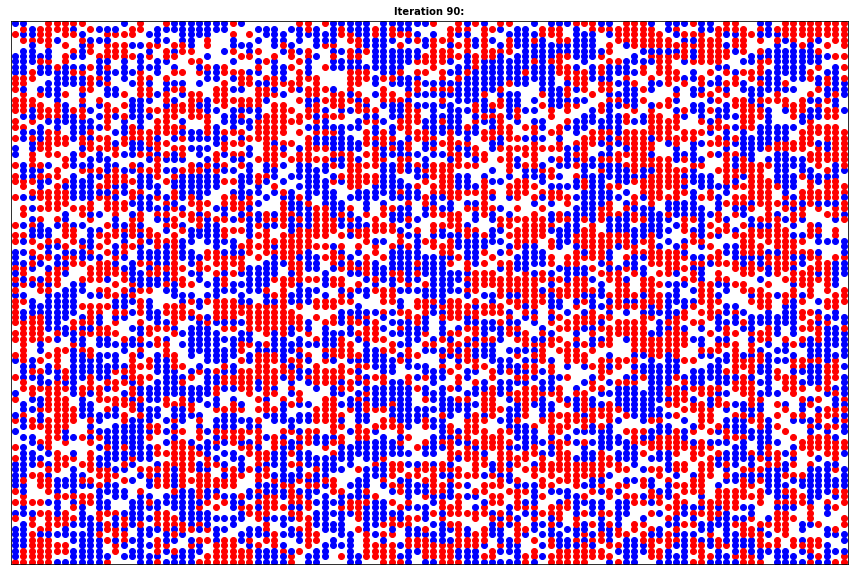

Iteration: 92, Number of changes: 5184
Iteration: 93, Number of changes: 5211
Iteration: 94, Number of changes: 5210
Iteration: 95, Number of changes: 5175
Iteration: 96, Number of changes: 5213
Iteration: 97, Number of changes: 5227
Iteration: 98, Number of changes: 5228
Iteration: 99, Number of changes: 5175
Iteration: 100, Number of changes: 5156
Iteration: 101, Number of changes: 5221


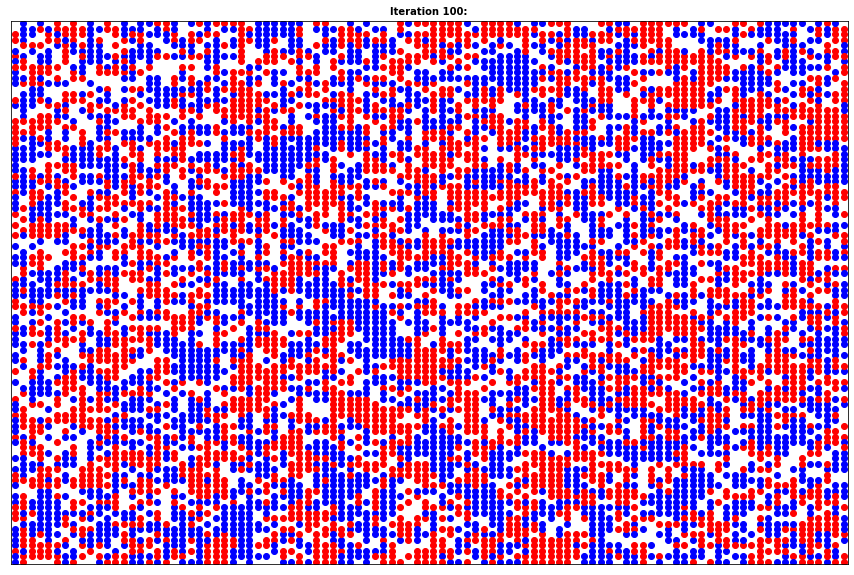

Iteration: 102, Number of changes: 5224
Iteration: 103, Number of changes: 5049
Iteration: 104, Number of changes: 4911
Iteration: 105, Number of changes: 4996
Iteration: 106, Number of changes: 5089
Iteration: 107, Number of changes: 5165
Iteration: 108, Number of changes: 5102
Iteration: 109, Number of changes: 5035
Iteration: 110, Number of changes: 5111
Iteration: 111, Number of changes: 5154


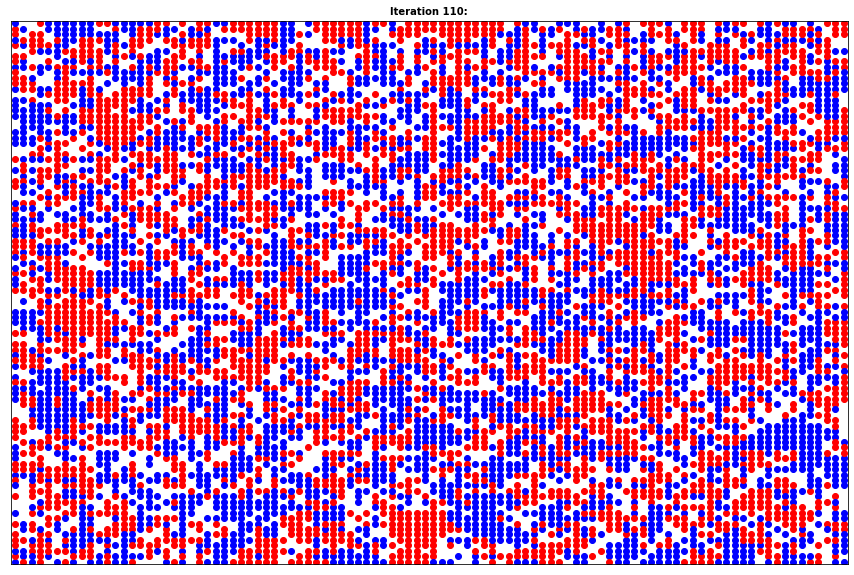

Iteration: 112, Number of changes: 5200
Iteration: 113, Number of changes: 5232
Iteration: 114, Number of changes: 5191
Iteration: 115, Number of changes: 5267
Iteration: 116, Number of changes: 5187
Iteration: 117, Number of changes: 5030
Iteration: 118, Number of changes: 5056
Iteration: 119, Number of changes: 5013
Iteration: 120, Number of changes: 5009
Iteration: 121, Number of changes: 5024


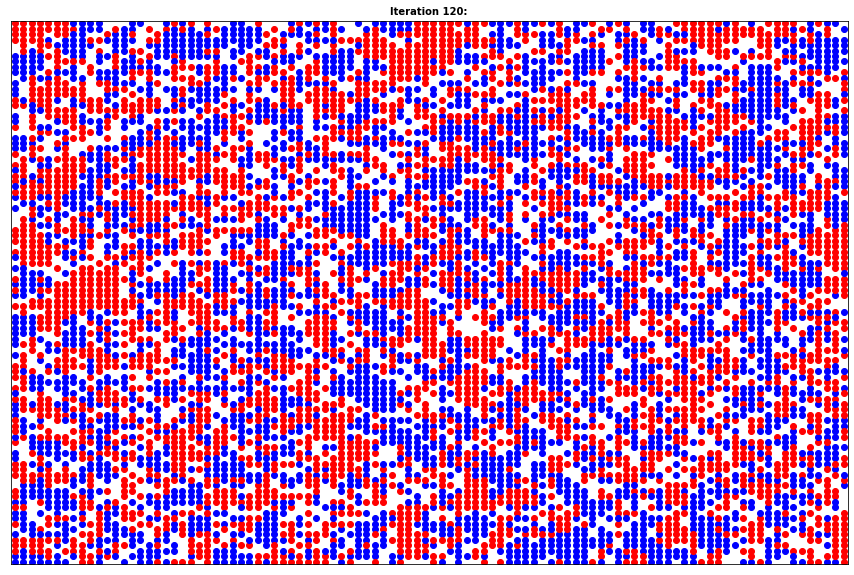

Iteration: 122, Number of changes: 5107
Iteration: 123, Number of changes: 5124
Iteration: 124, Number of changes: 4998
Iteration: 125, Number of changes: 5100
Iteration: 126, Number of changes: 4922
Iteration: 127, Number of changes: 5062
Iteration: 128, Number of changes: 5068
Iteration: 129, Number of changes: 5070
Iteration: 130, Number of changes: 5042
Iteration: 131, Number of changes: 5123


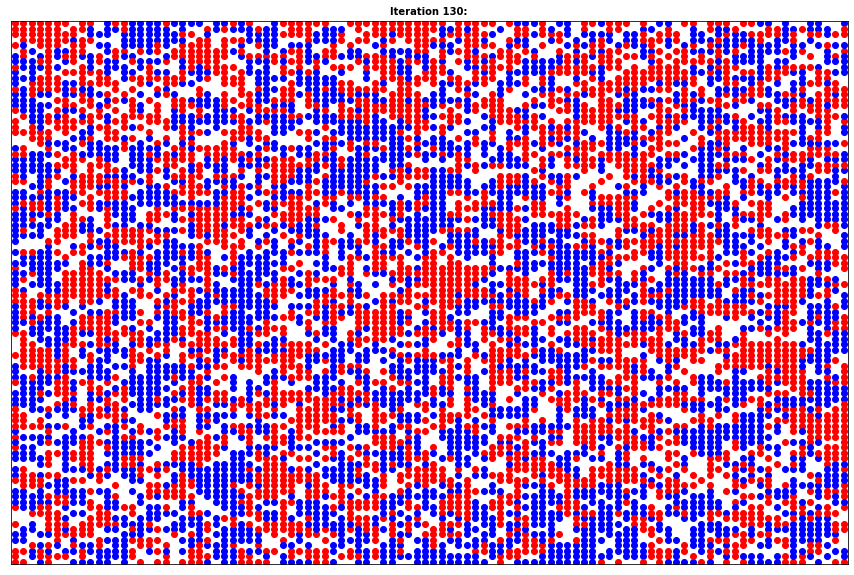

Iteration: 132, Number of changes: 4960
Iteration: 133, Number of changes: 4986
Iteration: 134, Number of changes: 5027
Iteration: 135, Number of changes: 5013
Iteration: 136, Number of changes: 5033
Iteration: 137, Number of changes: 5037
Iteration: 138, Number of changes: 5048
Iteration: 139, Number of changes: 4909
Iteration: 140, Number of changes: 5106
Iteration: 141, Number of changes: 5156


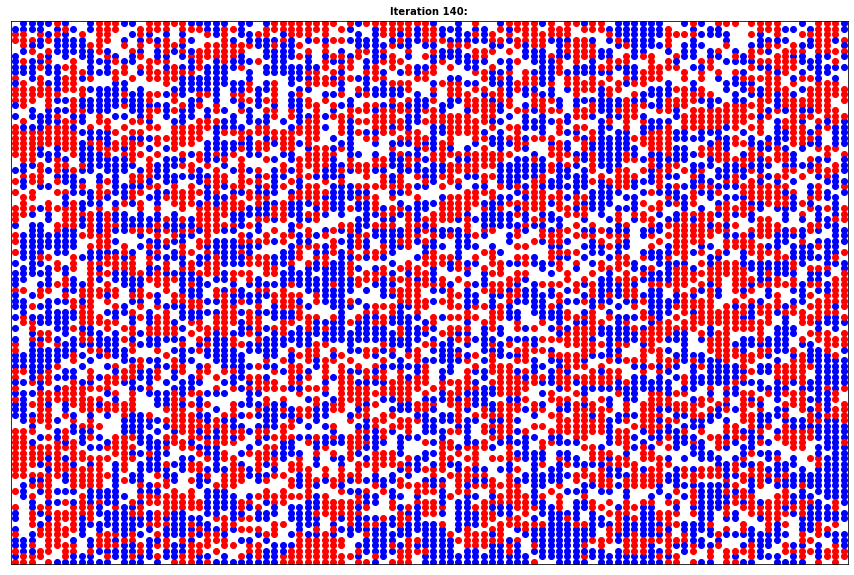

Iteration: 142, Number of changes: 5285
Iteration: 143, Number of changes: 5331
Iteration: 144, Number of changes: 5310
Iteration: 145, Number of changes: 5330
Iteration: 146, Number of changes: 5313
Iteration: 147, Number of changes: 5278
Iteration: 148, Number of changes: 5191
Iteration: 149, Number of changes: 5176
Iteration: 150, Number of changes: 5164
Iteration: 151, Number of changes: 5121


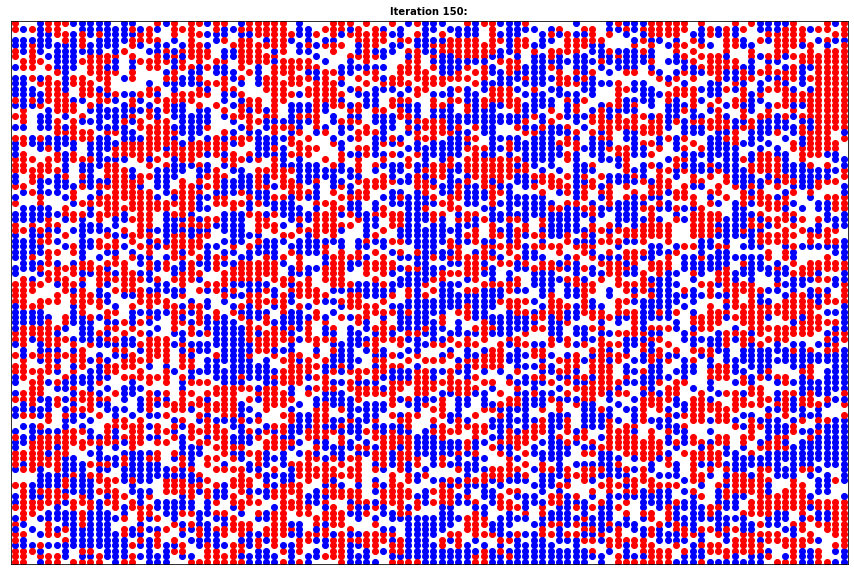

Iteration: 152, Number of changes: 5024
Iteration: 153, Number of changes: 5091
Iteration: 154, Number of changes: 5201
Iteration: 155, Number of changes: 5249
Iteration: 156, Number of changes: 5273
Iteration: 157, Number of changes: 5212
Iteration: 158, Number of changes: 5267
Iteration: 159, Number of changes: 5227
Iteration: 160, Number of changes: 5131
Iteration: 161, Number of changes: 5178


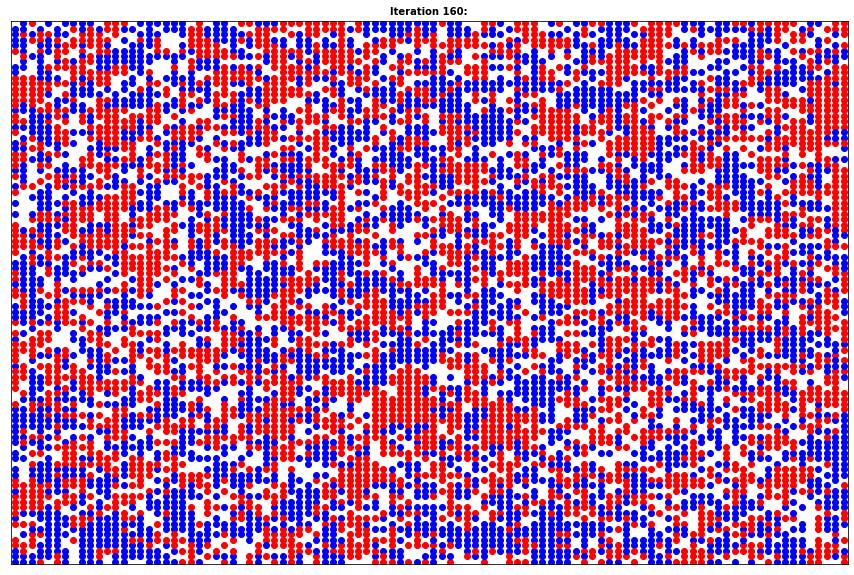

Iteration: 162, Number of changes: 5116
Iteration: 163, Number of changes: 5094
Iteration: 164, Number of changes: 5119
Iteration: 165, Number of changes: 5207
Iteration: 166, Number of changes: 5278
Iteration: 167, Number of changes: 5237
Iteration: 168, Number of changes: 5297
Iteration: 169, Number of changes: 5268
Iteration: 170, Number of changes: 5235
Iteration: 171, Number of changes: 5296


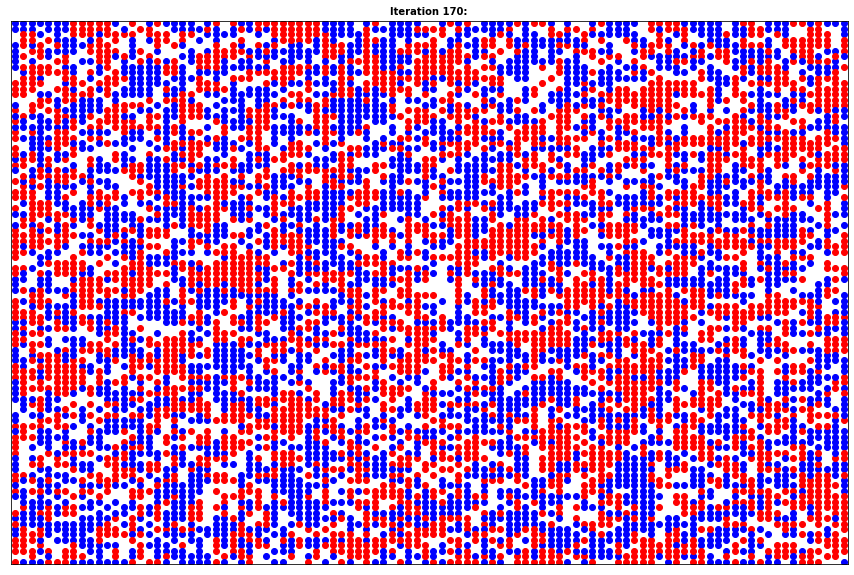

Iteration: 172, Number of changes: 5308
Iteration: 173, Number of changes: 5198
Iteration: 174, Number of changes: 5152
Iteration: 175, Number of changes: 5159
Iteration: 176, Number of changes: 5217
Iteration: 177, Number of changes: 5225
Iteration: 178, Number of changes: 5167
Iteration: 179, Number of changes: 5018
Iteration: 180, Number of changes: 5065
Iteration: 181, Number of changes: 4939


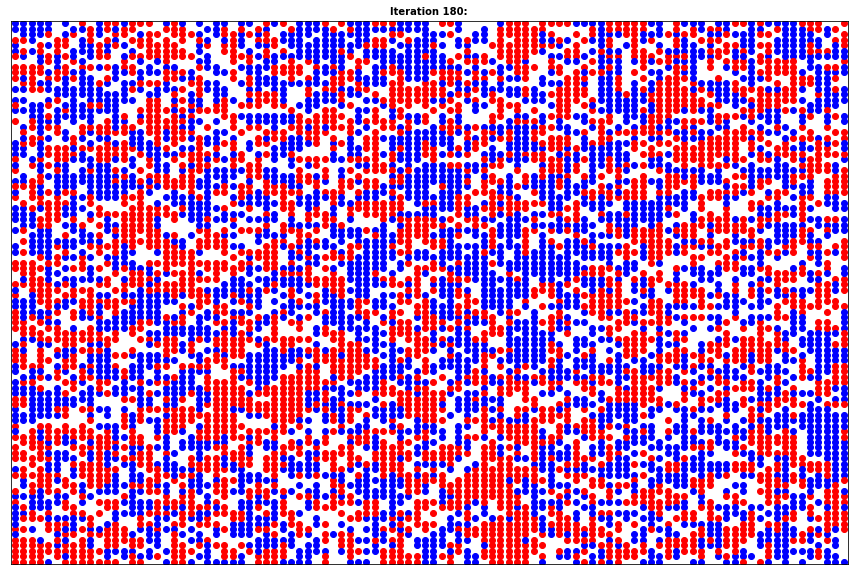

Iteration: 182, Number of changes: 5002
Iteration: 183, Number of changes: 5097
Iteration: 184, Number of changes: 5086
Iteration: 185, Number of changes: 5035
Iteration: 186, Number of changes: 4971
Iteration: 187, Number of changes: 5011
Iteration: 188, Number of changes: 5208
Iteration: 189, Number of changes: 5111
Iteration: 190, Number of changes: 5034
Iteration: 191, Number of changes: 5051


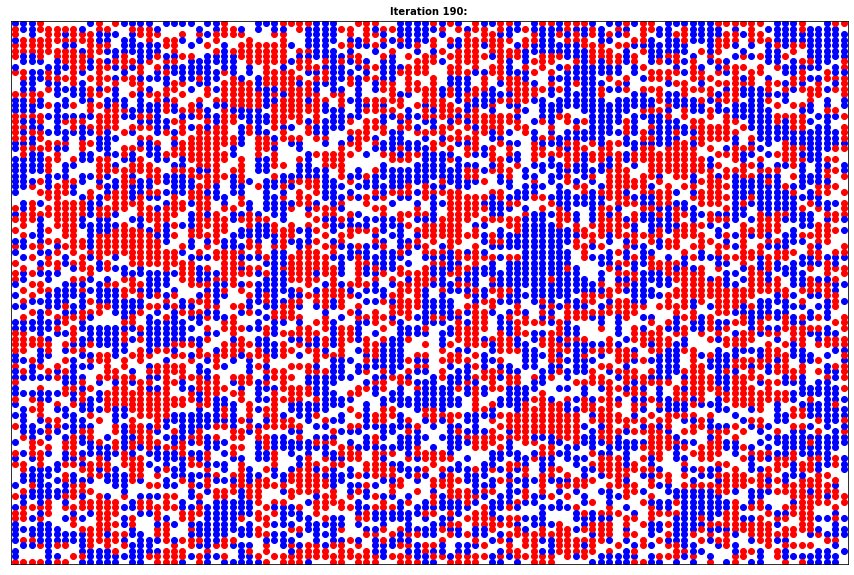

Iteration: 192, Number of changes: 5021
Iteration: 193, Number of changes: 5039
Iteration: 194, Number of changes: 5101
Iteration: 195, Number of changes: 5242
Iteration: 196, Number of changes: 5135
Iteration: 197, Number of changes: 5147
Iteration: 198, Number of changes: 5160
Iteration: 199, Number of changes: 5162
Iteration: 200, Number of changes: 5207
Iteration: 201, Number of changes: 5180


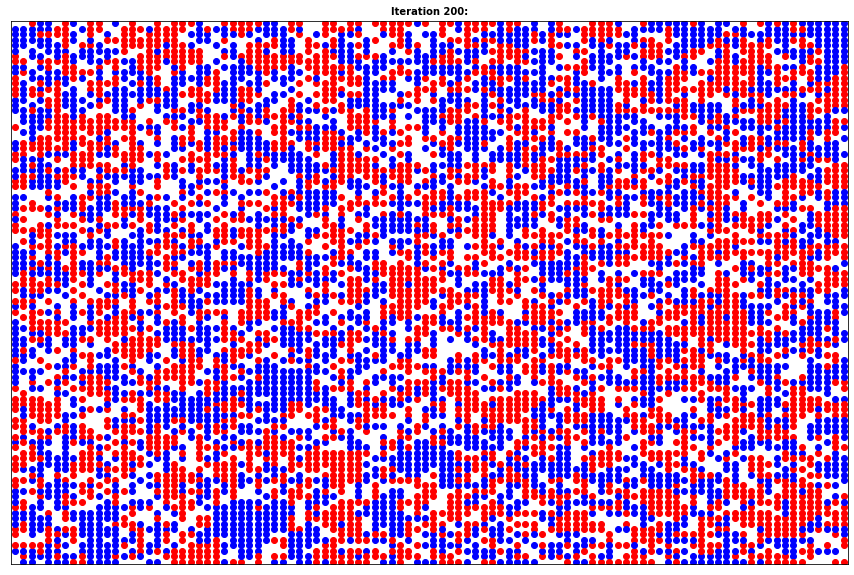

Iteration: 202, Number of changes: 5253
Iteration: 203, Number of changes: 5197
Iteration: 204, Number of changes: 5327
Iteration: 205, Number of changes: 5275
Iteration: 206, Number of changes: 5261
Iteration: 207, Number of changes: 5260
Iteration: 208, Number of changes: 5152
Iteration: 209, Number of changes: 5078
Iteration: 210, Number of changes: 4852
Iteration: 211, Number of changes: 4888


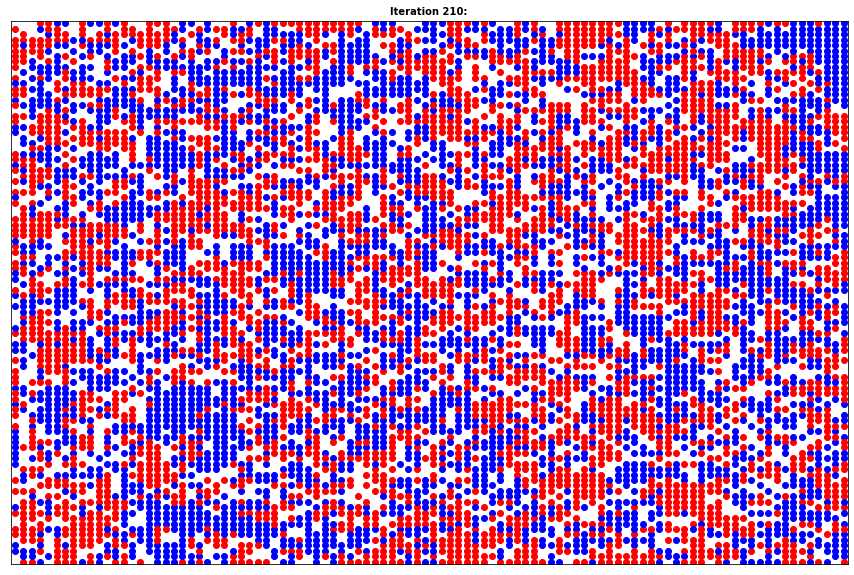

Iteration: 212, Number of changes: 4904
Iteration: 213, Number of changes: 4993
Iteration: 214, Number of changes: 4975
Iteration: 215, Number of changes: 5034
Iteration: 216, Number of changes: 4969
Iteration: 217, Number of changes: 5081
Iteration: 218, Number of changes: 5056
Iteration: 219, Number of changes: 5132
Iteration: 220, Number of changes: 5042
Iteration: 221, Number of changes: 5123


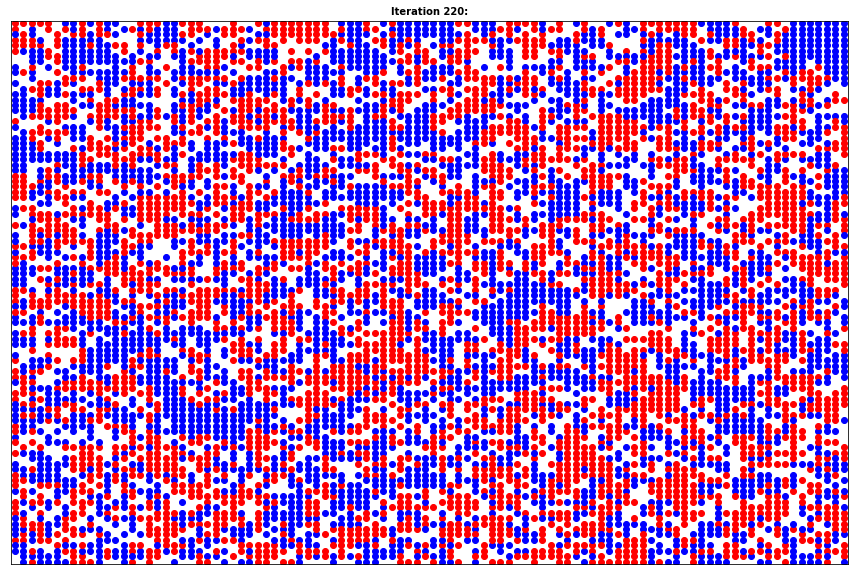

Iteration: 222, Number of changes: 5207
Iteration: 223, Number of changes: 5217
Iteration: 224, Number of changes: 5122
Iteration: 225, Number of changes: 5140
Iteration: 226, Number of changes: 5153
Iteration: 227, Number of changes: 5164
Iteration: 228, Number of changes: 5136
Iteration: 229, Number of changes: 5082
Iteration: 230, Number of changes: 5149
Iteration: 231, Number of changes: 5156


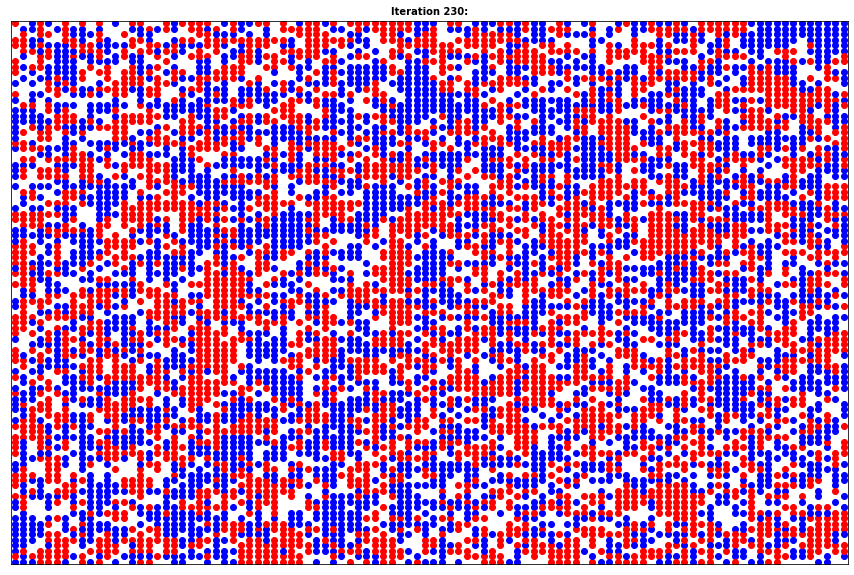

Iteration: 232, Number of changes: 5137
Iteration: 233, Number of changes: 5142
Iteration: 234, Number of changes: 5112
Iteration: 235, Number of changes: 5014
Iteration: 236, Number of changes: 5048
Iteration: 237, Number of changes: 5164
Iteration: 238, Number of changes: 5125
Iteration: 239, Number of changes: 5143
Iteration: 240, Number of changes: 5286
Iteration: 241, Number of changes: 5242


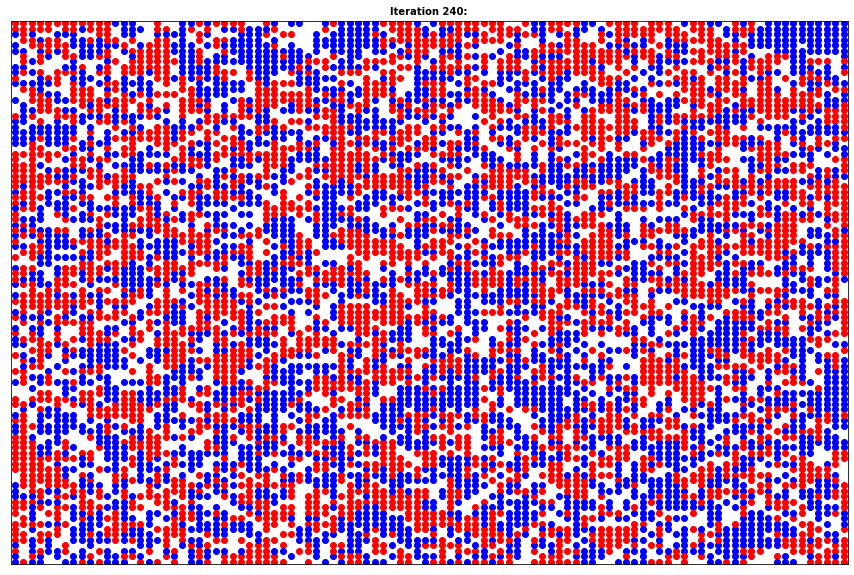

Iteration: 242, Number of changes: 5191
Iteration: 243, Number of changes: 5216
Iteration: 244, Number of changes: 5278
Iteration: 245, Number of changes: 5158
Iteration: 246, Number of changes: 5035
Iteration: 247, Number of changes: 5177
Iteration: 248, Number of changes: 5355
Iteration: 249, Number of changes: 5462
Iteration: 250, Number of changes: 5365
Iteration: 251, Number of changes: 5258


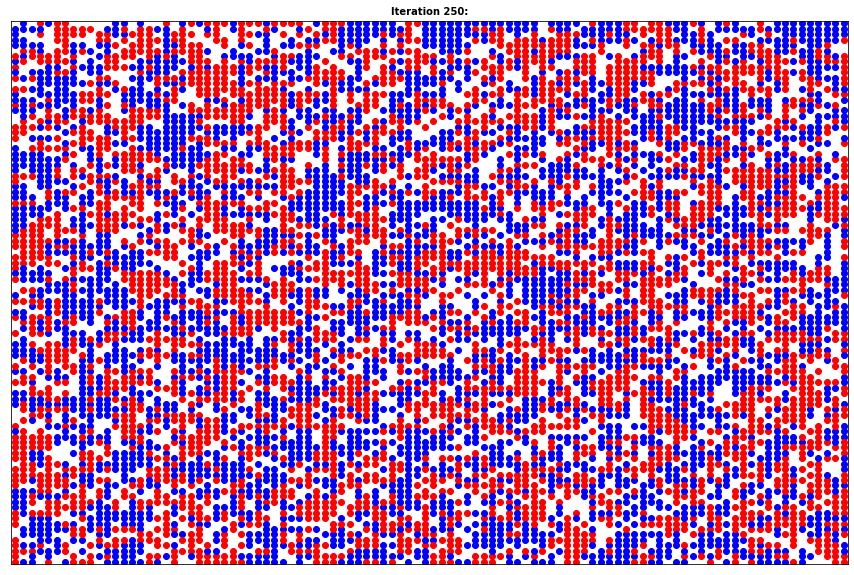

Iteration: 252, Number of changes: 5307
Iteration: 253, Number of changes: 5268
Iteration: 254, Number of changes: 5201
Iteration: 255, Number of changes: 5183
Iteration: 256, Number of changes: 5117
Iteration: 257, Number of changes: 5092
Iteration: 258, Number of changes: 5060
Iteration: 259, Number of changes: 5087
Iteration: 260, Number of changes: 5113
Iteration: 261, Number of changes: 5033


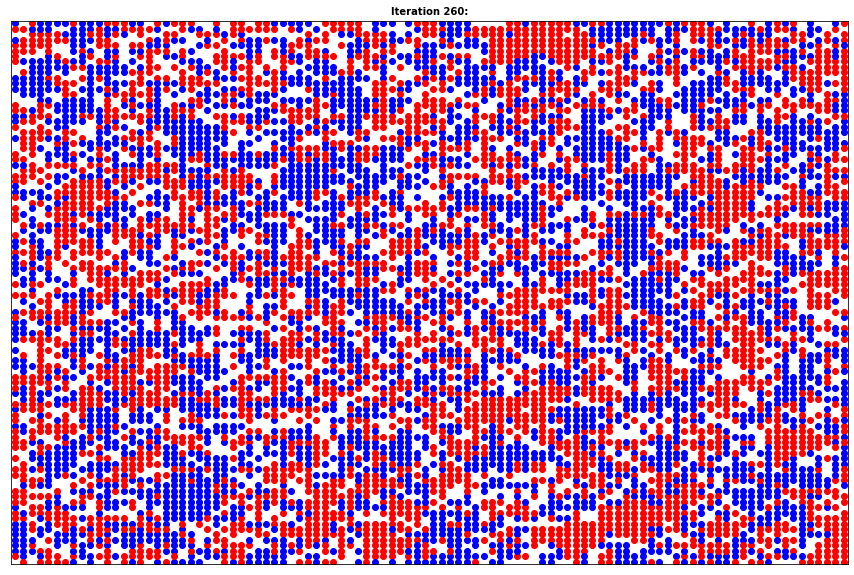

Iteration: 262, Number of changes: 5008
Iteration: 263, Number of changes: 4970
Iteration: 264, Number of changes: 5011
Iteration: 265, Number of changes: 5076
Iteration: 266, Number of changes: 5132
Iteration: 267, Number of changes: 5192
Iteration: 268, Number of changes: 5316
Iteration: 269, Number of changes: 5342
Iteration: 270, Number of changes: 5342
Iteration: 271, Number of changes: 5270


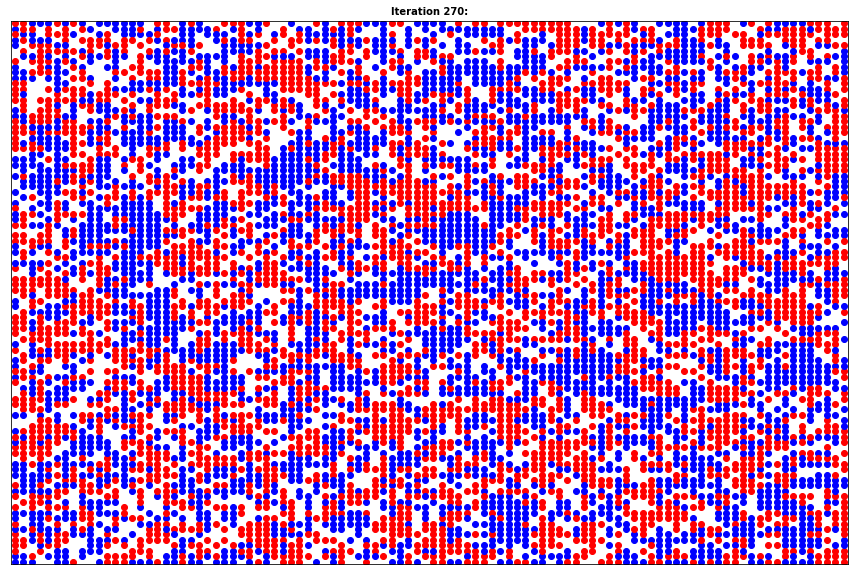

Iteration: 272, Number of changes: 5211
Iteration: 273, Number of changes: 5157
Iteration: 274, Number of changes: 5182
Iteration: 275, Number of changes: 5315
Iteration: 276, Number of changes: 5282
Iteration: 277, Number of changes: 5386
Iteration: 278, Number of changes: 5352
Iteration: 279, Number of changes: 5285
Iteration: 280, Number of changes: 5354
Iteration: 281, Number of changes: 5392


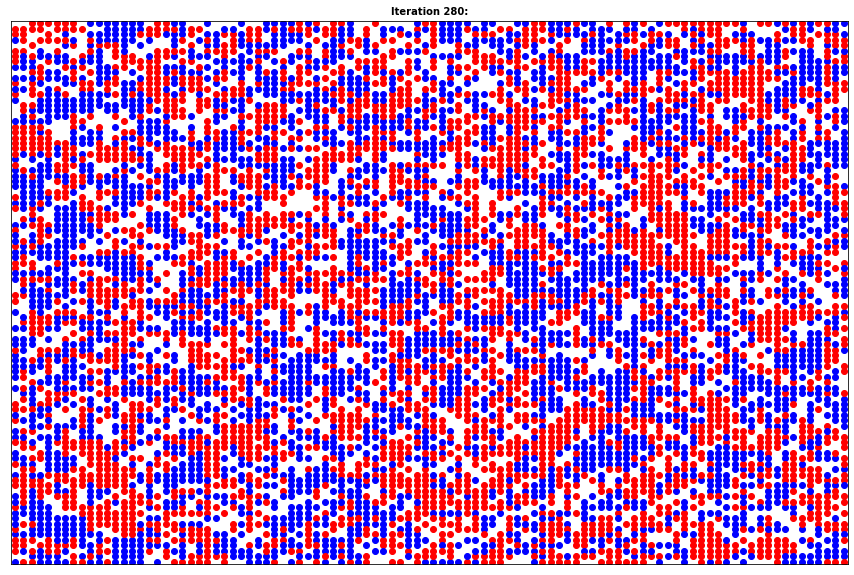

Iteration: 282, Number of changes: 5367
Iteration: 283, Number of changes: 5328
Iteration: 284, Number of changes: 5420
Iteration: 285, Number of changes: 5263
Iteration: 286, Number of changes: 5287
Iteration: 287, Number of changes: 5318
Iteration: 288, Number of changes: 5218
Iteration: 289, Number of changes: 5166
Iteration: 290, Number of changes: 5063
Iteration: 291, Number of changes: 5134


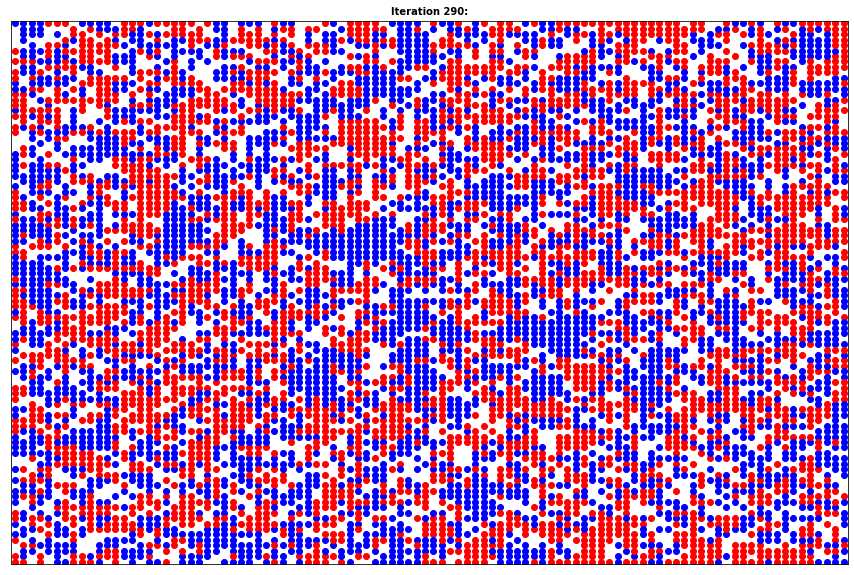

Iteration: 292, Number of changes: 5171
Iteration: 293, Number of changes: 5216
Iteration: 294, Number of changes: 5217
Iteration: 295, Number of changes: 5093
Iteration: 296, Number of changes: 5191
Iteration: 297, Number of changes: 5339
Iteration: 298, Number of changes: 5349
Iteration: 299, Number of changes: 5240
Iteration: 300, Number of changes: 5431


In [135]:
for i in range(n_iteration):
    old_agents = copy.deepcopy(agents)
    n_changes = 0
    
    for agent in old_agents:
        
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1
            
    print('Iteration: %d, Number of changes: %d' % (i+1, n_changes))
    
    if i % 10 == 0:
        plot(i)
        
    if n_changes == 0:
        break